In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<div class="alert alert-block alert-info" style="font-size:20px; border:1px solid black; padding:10px">
<center><h1>Post Goals:</h1></center>
    <ol>
        <li>Provide a Concise Introduction to Gaussian RBF Kernel Support Vector Machine Classification.</li><br>
        <li>Demonstrate how to perform Gaussian Kernel RBF using Python's Sklean library.</li><br>
    </ol>
</div>

<hr style="border-top: 5px solid black;">

In [2]:
# to load images for this tutorial
from IPython.display import Image
import os
path = os.getcwd()

# Math libraries
import numpy as np

# Data visualization module
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pandas as pd
import seaborn as sns

# SVM and Other Key ML modules
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Post Overview.</font></h1></center>
    <ol>
        <li><a href="#objective1">Introduction to Nonlinear Suppor Vector Machine (SVM) Classification.</a></li><br>
        <li><a href="#objective2">Introduction to Gaussian Radial Basis Function (RBF) Kernel in SVM Classification.</a></li><br>
        <li><a href="#objective3">Mathematic Intuition of Gaussian RBF Kernel Function.</a></li><br>           
        <li><a href="#objective4">Demonstrate how to carry out Gaussian RBF Kernel using <code>SVC(kernel="rbf")</code> on the <code>make_moons</code> dataset.</a></li><br>
        <li><a href="#objective5">Demonstrate how to carry out Gaussian RBF Kernel classification using <code>SVC(kernel="rbf")</code> on 2020-2021 NFL player data.</a></li><br>
        <li><a href="#objective6">Provide a detailed overview of the methods invoked during Gaussian RBF SVM classification.</a></li><br>
    </ol>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective1" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Introduction to Nonlinear Suppor Vector Machine (SVM) Classification</font></h1></center>
    <hr>
    <ul><h4></h4>
        <li>Support Vector Machine algorithm is a powerful supervised Machine Learning Models capable of performing
            <ul>
        <li>Linear classification</li>
        <li><font color="red">Nonlinear classification</font></li>
        <li>Regression</li>
        <li>Outlier detection</li>
            </ul>
        </li><br>
        <li>SVM is one of the most popular machine learning models and is well suited for classification of complex datasets that are small and medium sized.</li><br>
        <li>Like logistic regression, support vector machines were designed for binary classification and do not natively support classification tasks with more than two classes.</li><br>
        <li>In this algorithm, data is plotted in n-dimensional space (where n is number of features you have). Then, we perform classification by finding a decision boundary (aka hyperplane in 3d+) that best differentiates the two classes.</li><br>     
        <li><mark style="background-color: yellow;">The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.</mark></li><br>
        <li>Decision boundaries are used in SVM to help sort data into categories for classification.</li><br>     
        <li>Although linear SVM classification is generally efficient and works in many cases, most datasets are not linearly separable.</li><br>
        <li>Nonlinear SVM classification are methods used to work with nonlinear data and includes:
            <ul>
                <li>Polynomial Features</li>
                <li>Polynomial Kernel</li>
                <li>Similarity Features</li>
                <li>Gaussian RBF Kernel</li>  
            </ul>
        </li><br>
        <li>SVM is popular because of the Kernel functions, which helps solve nonlinearity, especially for complex datasets.</li><br>        
        <li>The method used to handle nonlinearity depends on the size of the dataset, it's complexity, and the computational resources available.</li><br>
        <li><font color="red">This post will focus on Gaussian RBF Kernel Classification using polynomial kernel.</font></li><br>
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective2" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Introduction to Gaussian Radial Basis Function (RBF) Kernel in SVM Classification.</font></h1></center>
    <hr>
    <ul><h4>Why Polynomial Kernel is popular.</h4>
        <li>Improved performance over using polynomial features to transform nonlinear data.</li><br>        
        <li>The use of polynomial features works well in cases with low polynomial degrees are used.</li><br>
        <li>Using high degrees of polynomial creates a huge number of features and makes the model run too slow.</li><br>
        <li>On the otherhand, <strong>Polynomial Kernel</strong> is part of a suite of mathematical kernel tricks developed to help add many polynomial features without actually having to add them. In otherwords, it makes it possible to work with extremely complex data without sacrificing performance.</li><br>
        <li>The <strong>Kernel</strong> part refers to <strong>Kernelization</strong>, which is a technique used to design efficient algorithms.</li><br>
        <li>Kernel functions take in data and transforms it into the required form.</li>
        <li>There are several different kernel functions, the most popular functions include:
            <ul>
                <li>Polynomial Kernel</li>
                <li>Gaussian Kernel</li>
                <li><font color="red">Gaussian Radial Basis Function (RBF)</font></li>
                <li>Laplace Radial Basis Function</li>
                <li>Hyperbolic Tangent Kernel</li>
                <li>Sigmoid Kernel</li>
                <li>Anova Radial Basis Kernel</li>
                <li>Linear spline kernel in 1d</li>
            </ul>
        </li><br>
        <li>This post will focus on <font color="red">Gaussian Radial Basis Function (RBF)</font>.</li><br>
        <li>RBF Kernel are the most generalized form of kernelization and is a widely used kernel function.</li><br>
        <li></li><br>        
        <li>The goal of polynomial kernel is to create a function that maps nonlinear data into a high-dimensional space, thereby making the remapped data linearly separable.</li><br>
        <li>Linear SVM can then be applied to remapped nonlinear data, and classification performed.</li><br>
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective3" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Mathematic Intuition of Gaussian RBF Kernel Function</font></h1></center>
    <ul><h4>Kernel Trick</h4>
        <li>Kernel functions use a <em>trick</em>, which is a method to compute the dot product of two vectors <strong>x</strong> and  <strong>y</strong> in some feature space.</li><br>
        <li>Applying the kernel trick just means to replace the dot product of the two vectors.</li><br>
        <li>These methods make it easier to transform complex nonlinear data for Support Vector Machine Learning.</li><br>
    </ul>
    <hr>
    <ul><h4>Gaussian RBF Kernel</h4>
        <li>RBF Kernel function takes two points and computes the similarity of how close they are to each other.</li><br>
        <li>The <a href="#equation1">General Gaussian RBF Kernel</a> is defined as: <br>
            <strong><math>&Phi;(x, l) = exp(-&gamma;||x - l||)<sup>2</sup> )</math></strong><br>
        </li><br>
        <li>Like several other methods used to address non linear data, Gaussian RBF does so by adding features that help transform the data linearly.</li><br>  
        <li>Gaussian RBF does this by using similarity functions that measures how much each instance resembles a particular data point, called a landmark.</li><br>
        <li><a href="#example1">Example</a>:
            <ul>
                <li>Take the following 1-dimensional datasets <strong>(left side plot)</strong>.</li><br>
                <li>Suppose that we selected two landmarks and set &gamma; = 0.03
                    <br><code>x<sub>1</sub> = -2</code>
                    <br><code>x<sub>1</sub> = 1</code>
                </li><br>
                <li>Using the <a href="#equation1">Gaussian RBF equation</a> we obtain two new features <code>x<sub>2</sub></code> and <code>x<sub>3</sub></code>:
                    <br><code>x<sub>2</sub> = exp(-0.03 * 1<sup>2</sup>) &#8776; 0.74</code>
                    <br><code>x<sub>3</sub> = exp(-0.03 * (-2)<sup>2</sup>) &#8776; 0.30</code>
                </li><br>
                <li>Using the same landmark, This operation is performed for each instance and the transformed dataset is now linearly separable <strong>(ride side plot)</strong>.</li><br> 
                <li>This method can be computational expensive, but the Gaussian RBF Kernel makes it possible even with large datasets.</li><br>
                <li>The <a href="https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py">two major hyperparameters for RBF SVM</a> that influence the models performance are:
                    <ul>
                        <li><strong>gamma:</strong>
                            <ul>
                                <li>Defines how far the influence of a single training example reaches.</li>
                                <li>Low values will give an instance ‘far’ influence.</li>
                                <li>High values will give an instance ‘close’ influence. </li>
                                <li>The Gamma parameters is the inverse of the radius of influence of samples selected by the model as support vectors.</li>
                                <li>If gamma is large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.</li>
                                <li>If gamma is small, the model is too constrained and cannot capture the complexity or “shape” of the data.</li>
                                <li>If gamma is small, the region of influence of any support vector would include the whole training set. The model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.</li>
                            </ul>
                        </li><br>
                        <li><strong>C:</strong>
                            <ul>
                                <li>C behaves as a regularization parameter in the SVM.</li>
                                <li>The C parameter trades off correct classification of training examples against maximization of the decision function’s margin.</li>
                                <li>Larger C: Encourages a smaller margin, the decision function is better at classifying all training points correctly. </li>
                                <li>Smaller C: Encourages a larger margin, it creates a simpler decision function, at the cost of training accuracy (more misclassifications). </li>
                                <li>Smaller C values generally lead to more support vectors, which may increase prediction time.</li>
                                <li>Lowering the value of C involves a trade-off between fitting time and prediction time.</li>                               
                            </ul>
                        </li><br>
                    </ul>
                </li><br> 
            </ul>
        </li>      
    </ul>
</div>

<div id="example1">
</div>

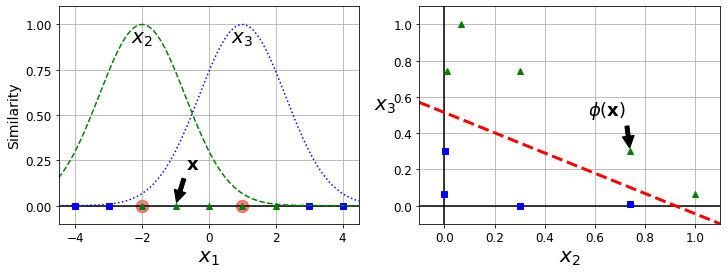

In [3]:
# Create sample data
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])


def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Comments</font></h2></center>
    <ul><strong>Left Plot: Original Nonlinear Data</strong>
        <li><strong>x</strong> represents a data instance for the green triangle class.</li><br>
        <li><strong>orange circled green data points</strong> are the example landmarks.</li><br>
        <li><strong>blue squares</strong> represent the glue class data instances.</li><br>
        <li><strong>blue and green dashed bell shaped curves</strong> represent the Gaussian RBF, which varies from 0 to 1. This range is the distance to the landmark for each point.</li>
        <li>Gamma modulates the size of this function and the width of the curve.
            <ul>
                <li>A smaller gamma increases the size of the curve, because each instance has a larger range of influence. The decision boundary becomes smoother.</li><br>
                <li>A larger gamma narrows the size of the bell shaped curve, because each instance has a smaller range of influence.  The decision boundary becomes more irregular.</li><br>
            </ul>
        </li><br>         
    </ul>
    <ul><strong>Right Plot: "Transformed" Linearized Data</strong>
        <li>Two new features have been created with the Gaussian RBF function</li><br>        
        <li>The original <strong>x</strong> instnace is now replotted at the new features as <strong>&Phi;(x)</strong>.</li><br>
        <li>The green and blue instances are now linearly separable.</li><br>        
    </ul>    
</div>

<div id="equation1">
</div>

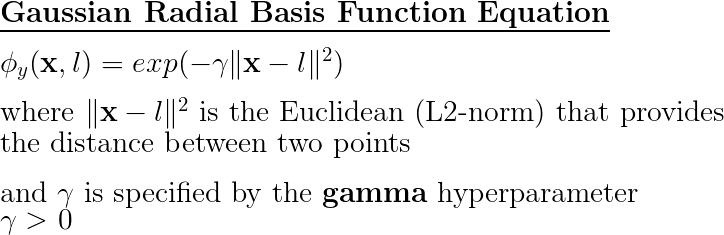

In [4]:
img = os.path.join(path, 'static/images/gaussian_rbf/equation1.png')
Image(filename=img) 

<hr style="border-top: 5px solid black;">

<div id="objective4" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Demonstrate how to carry out Gaussian RBF Kernel SVM classification using <code>SVC(kernel="rbf")</code> and the <code>make_moons</code> dataset.</font></h1></center>
    <ul>
        <li>The <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html"><code>make_moons</code></a> dataset is a toy dataset use in binary classification problems.</li><br>
        <li>The dataset uses <a href="random sample generators that can be used to build artificial datasets of controlled size and complexity.">Generated datasets</a>, which in this case, is used to make two interleaving half circles.</li><br>
        <li>Sklearn Generated datasets have single label and multilabel datasets.</li><br>
        <li>There are two datasets for the single label cases.
            <ol>
                <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs"><code>make_blobs</code></a></li>
                <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification"><code>make_classification</code></a></li>
                <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs"><code>make_blobs</code></a></li>
                <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles"><code>make_circles</code></a></li> 
                <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons"><code>make_moons</code></a></li>                 
            </ol>
        </li><br>
        <li>Both <code>make_circles</code> and <code>make_moons</code> generate 2d binary classification datasets that are challenging to certain algorithms (e.g. centroid-based clustering or linear classification), including optional Gaussian noise, and are great for visualisation .</li><br>
        <li><code>make_circles</code> produces Gaussian data with a spherical decision boundary for binary classification, while <code>make_moons</code> produces two interleaving half circles.</li><br>
        <li>This post will use <code>make_moons</code> to illustrate the principle of polynomial kernel in SVM classificaiton.</li><br>
        <hr>
        <li><h2>The <code>make_moons</code> dataset explained</h2></li><br>
        <li><strong><code>sklearn.datasets.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)</code></strong> Parameters Explained:
            <ul>
                <li><strong><code>n_samples (int or tuple of shape (2,), dtype=int, default=100)</code></strong>: If int, the total number of points generated. If two-element tuple, number of points in each of two moons.</li>
                <li><strong><code>shuffle (bool, default=True)</code></strong>: Whether to shuffle the samples</li>
                <li><strong><code>noise (float, default=None)</code></strong>: Standard deviation of Gaussian noise added to the data./li>
                <li><strong><code>random_state (int, RandomState instance or None, default=None)</code></strong>: Determines random number generation for dataset shuffling and noise. Pass an int for reproducible output across multiple function calls</li>
            </ul>
        </li><br>
        <li>What this class returns:
            <ul>
                <li><strong><code>X (ndarray of shape (n_samples, 2))</code></strong>: The generated samples.</li>
                <li><strong><code>y ndarray of shape (n_samples,)</code></strong>: The integer labels (0 or 1) for class membership of each sample.</li>
            </ul>
        </li><br>
        <li><strong>Import Data</strong> <code>from sklearn.datasets import make_moons</code></li><br>
        <li><strong>Visualize sample dataset</strong> using custom function <code>plot_dataset()</code></li><br> 
        <li>A sample of 100 data points classified into two groups was generated from <code>make_moons</code> </li><br>
        <li>As can see in <a href="#plot1">Make moons data example</a>, the data contains two classes that swirl together (look like crescent moons), and would not be linearly separable using standard linear SVM classification. The data would need to be transformed.</li>
    </ul>
</div>

<div id="plot1">
</div>

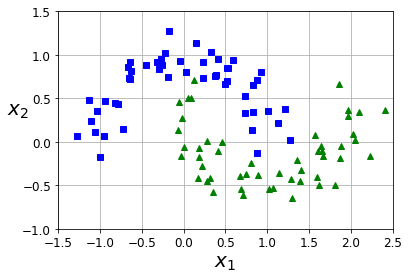

In [5]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Gaussian RBF Kernel on Moons Dataset</font></h1></center>
<ul><h2>Methods Overiew</h2>
        <li><strong>Moon Data</strong>: A sample of 100 data points classified into two groups was generated from <code>make_moons</code>.</li><br>
        <li><strong>Polynomial Kernel</strong> steps:
            <ol>
                <li>The first step is to use Sklearn <code>Pipeline</code>, which assemble several steps that can be cross-validated together while setting different parameters. It makes it easier to code.</li>
                <li>The second step is to standarize the feature data using <code>StandardScaler</code> method. Linear SVM is sensitive to feature scaling, so this is a standard step you should include in your workflow.</li>
                <li>The third step is to pass the standardized data to the <code>SVM()</code> method.</li>
                <li>The fourth step is to train our data with this model.</li>
                <li>Finally, we evaluate the performance of our model by plotting the data using a custom function.</li>
            </ol>
    </li><br>
    </ul>
</div>    

In [6]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Code Explained</font></h1></center>
    <li>For detailed information on the methods used, and in particular, the parameters and attributes, please see <a href="#objective6">Objective 6</a> of this post.</li>
    <ul><strong>Sklearn <code>Pipeline()</code></strong>
        <li><strong>Explanation of our code <code>Pipeline([("scaler", StandardScaler()), ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))])</code>:</strong>:
            <ul>
                <li>the steps parameter is: <code>[("scaler", StandardScaler()), ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))]</code>.  This is a list with tuples, as described above. Each tupple contains the name in each step, and the second element in the tuple is the transform method.</li>
                <li>The steps will be performed according to their idex in the list of steps. First "scaler", then "svm_clf".</li>              
            </ul>
        </li>
    </ul>
    <hr>
    <ul><strong>Sklearn <code>StandardScaler()</code></strong>
        <li><strong>Explanation of our code <code>StandardScaler()</code>: </strong>. Use default settings.</li>
    </ul>
    <hr>
    <ul><strong>Sklearn <code>SVC()</code></strong>
        <li><strong>Explanation of our code <code>SVC(kernel="rbf", gamma=5, C=0.001)</code>:</strong> method.
            <ol>Parameters in order of apperance
                <li><code>kernel="rbf"</code> is the default when not specified, and specifies the use of the Gaussian RBF kernel.</li>
                <li><code>gamma=5</code>. The default is usually "scale", and the magnitude of this value afffects the range of influence for each instance, and the regularity of the decision boundary.  Gamma acts like a regularization hyperparameter.  We reduce gamma if the model is overfit, and increase gamma if the model is underfit.</li>
                <li><code>C=0.001</code>
                    <ul>
                        <li>this is the regularization term</li>
                        <li>the default value is 1.0</li>
                        <li>The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface.</li>
                        <li>A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly.</li>
                        <li>In this example, we use a low C, which makes the decision surface smoother.</li>
                    </ul>
                </li>
            </ol>
        </li>
    </ul>
</div>    

In [7]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

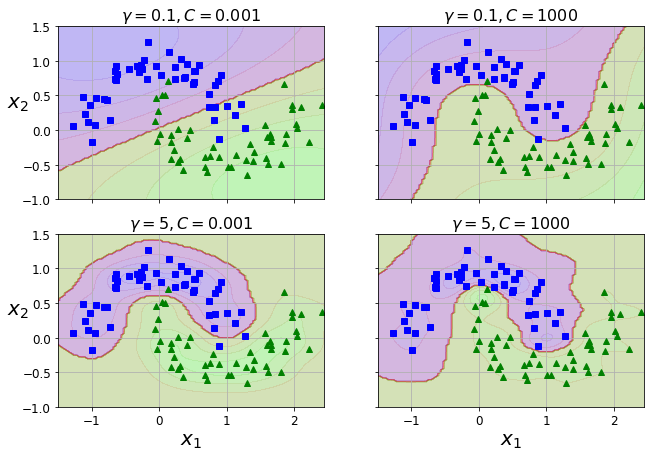

In [8]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Comments</font></h2></center>
    <ul>
        <li><strong>Top left plot:</strong> Small gamma and Small C
            <ul>
                <li>Small gamma constrains the model as the region of influence for each instance is large.</li>
                <li>Small C hyperparameter encourages a larger margin, and a simpler decision function, reducing the training accuracy.</li>
                <li>Botton line, this combination of hyperparameters behaves like a linear model, and this has the poorest classification for this nonlinear dataset.</li>
            </ul>
        </li><br>
        <li><strong>Top right plot:</strong> Small gamma and Large C
            <ul>
                <li>Small gamma constrains the model as the region of influence for each instance is large.</li>
                <li>Large C hyperparameter encourages a smaller margin, and the decision function is better at classifying the training points. Less tolerance for misclassification.</li>
                <li>Botton line, this combination of hyperparameters does a better job at classifying nonlinear data, than the top left plot, and the decision boundary wraps around areas of dense data points.</li>
            </ul>
        </li><br>        
        <li><strong>Bottom left plot :</strong> Large gamma and Small C
            <ul>
                <li>Large gamma reduces the radius of the area of influence for each instance. The influence of training instances is close to other data points.</li>
                <li>Small C hyperparameter encourages a larger margin, and a simpler decision function, reducing the training accuracy.</li>
                <li>Botton line, this combination of hyperparameters does a better job at classifying nonlinear data, than the top left plot, and the decision boundary wraps around the edges of each data cluster. Since the C hyperparameter is small, the decision boundary will be smooth.</li>
            </ul>        
        </li><br>
        <li><strong>Bottom right plot :</strong> Large gamma and Large C 
                    <ul>
                <li>Large gamma reduces the radius of the area of influence for each instance. The influence of training instances is close to other data points.</li>
                <li>Large C hyperparameter encourages a smaller margin, and the decision function is better at classifying the training points. Less tolerance for misclassification.</li>
                <li>Botton line, this combination of hyperparameters appears to have the best performance at  classifying the nonlinear make moons dataset. The decision boundary wraps around the edges of each data cluster. Since the C hyperparameter is large, the decision boundary will appear irregular and will do a better job at accurately classifying data points.</li>
            </ul>  
        </li><br>
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective5" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Demonstrate how to carry out Gaussian RBF Kernel SVM classification using <code>SVC(kernel="rbf")</code> on 2020-2021 NFL player data.</font></h1></center>
    <ul>
        <li>NFL data was obtained from <a href="https://sportsdata.io/">SportDataIO</a> and loaded into Pandas dataframe. A guide to making an API call to SportDataIO can be obtained in <a href="https://trinidadcisneros.com/folders/python/python_sportsdataio_api.html">A quick and easy guide to make a SportsDataIO API call and load data to Pandas.</a> post.</li>
        <li>The data consists of players, their weights, heights, and position.</li>
        <li>The goal is to classify players' position based on their weight and height.</li>
        <li>There are various positions, but two were selected for this example.</li>
        <li>The same methods used in the moons dataset were applied to this dataset.</li>     
    </ul>
</div>

In [9]:
# Files
nfl_file = 'static/data/nfl_df.csv'
nfl_abbreviation_file = 'static/data/nfl_abbr.csv'

# Import into pandas dataframe
nfl_df = pd.read_csv(nfl_file)
nfl_abbr = pd.read_csv(nfl_abbreviation_file)

# Merge dataframes
merged_df = nfl_df.merge(nfl_abbr, on ='Position')

# Rearrange columns
merged_df = merged_df[['PlayerID', 'ShortName', 'Team', 'Position', 'Position Title', 'Height_in', 'Weight_lbs', 'PhotoUrl']]

# Dataframe 1 (Offensive Lineman and Cornerback)
group=['Punter', 'Inside Linebacker']
df = merged_df.loc[merged_df['Position Title'].isin(group)].reset_index(drop=True)
df["target"] = np.where(df['Position Title'] == 'Punter', 1, 0)  # add target column
# remove a group of outliers
df = df[df['Height_in'] > 65]

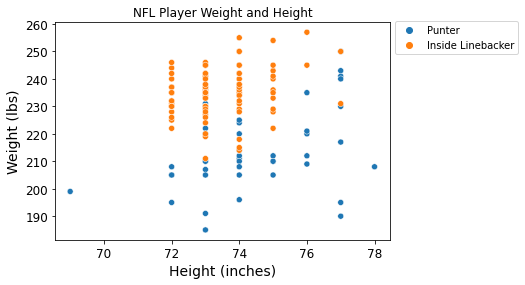

In [10]:
# plot actual nfl player data
sns.scatterplot(x='Height_in',y='Weight_lbs', data=df, hue='Position Title')
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.title('NFL Player Weight and Height')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.93))
plt.show()

In [11]:
# Prepare parameters
X = df[['Height_in','Weight_lbs']].to_numpy()  # converts to 2d numpy array
y = df.target.to_numpy()

In [12]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

<h2>Evaluate Model Performance</h2>

In [13]:
# for comparison, we will also perform a polynomial features, which does not use the kernel trick
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter = 10000, random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=10000,
                           random_state=42))])

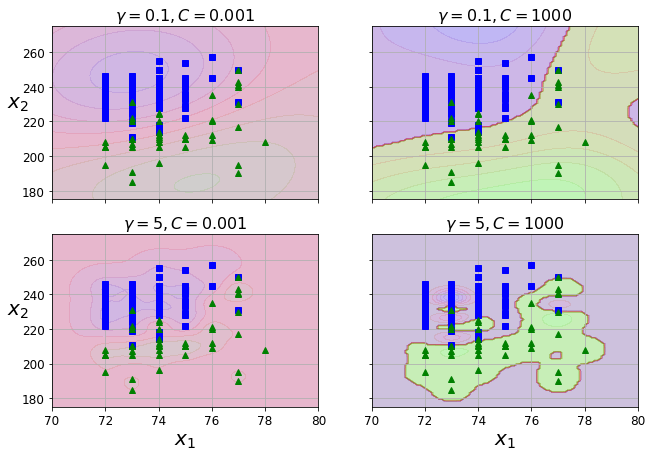

In [14]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [70, 80, 175, 275])
    plot_dataset(X, y, [70, 80, 175, 275])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Comments</font></h2></center>
    <ul>
        <li><strong>Top left plot:</strong> Small gamma and Small C
            <ul>
                <li>Small gamma constrains the model as the region of influence for each instance is large.</li>
                <li>Small C hyperparameter encourages a larger margin, and a simpler decision function, reducing the training accuracy.</li>
                <li>Botton line, this combination of hyperparameters behaves like a linear model, although the decision boundary is not visible in this plot. This combination has the poorest classification for this nonlinear dataset.</li>
            </ul>
        </li><br>
        <li><strong>Top right plot:</strong> Small gamma and Large C
            <ul>
                <li>Small gamma constrains the model as the region of influence for each instance is large.</li>
                <li>Large C hyperparameter encourages a smaller margin, and the decision function is better at classifying the training points. Less tolerance for misclassification.</li>
                <li>Botton line, this combination of hyperparameters does a better job at classifying nonlinear data, than the top left plot, the decision boundary appears to separate both NFL player types, with some misclassifications, as expected of a model with a larger C hyperparameter.</li>
            </ul>
        </li><br>        
        <li><strong>Bottom left plot :</strong> Large gamma and Small C
            <ul>
                <li>Large gamma reduces the radius of the area of influence for each instance. The influence of training instances is close to other data points.</li>
                <li>Small C hyperparameter encourages a larger margin, and a simpler decision function, reducing the training accuracy.</li>
                <li>Botton line, no visible decision boundary used to separate data.</li>
            </ul>        
        </li><br>
        <li><strong>Bottom right plot :</strong> Large gamma and Large C 
                    <ul>
                <li>Large gamma reduces the radius of the area of influence for each instance. The influence of training instances is close to other data points.</li>
                <li>Large C hyperparameter encourages a smaller margin, and the decision function is better at classifying the training points. Less tolerance for misclassification.</li>
                <li>Botton line, this combination of hyperparameters appears to have the best performance at  classifying the nonlinear make moons dataset, although it appreas to be overfit.</li>
            </ul>  
        </li><br>
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Final Thoughts</font></h2></center>
    <ul>
 <li><mark style="background-color: yellow;">The objective of this post is to introduce Gaussian RBF Kernel and Support Vector Machine Learning.</mark></li><br>
        <li>This post also discussed the mathematical intuition of Gaussian RBF Kernel, and the Sklearn methods in details, including the key hyperparameters used to train these class of models.</li><br>
        <li>This post also used dummy and real data to demonstrate how to Gaussian RBF.</li><br>
        <li>This post scratches the surface of this topic, but I hope it provides an introduction to this material, and sample code to being your own analysis</li>
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective6" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Methods Explained</font></h1></center>
    <ul><strong>Sklearn <code>Pipeline()</code></strong>
        <li><code>class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)</code></li><br>
        <li><strong>Purpose:</strong> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipeline</a> assemble several steps that can be cross-validated together while setting different parameters. It makes it easier to code.</li><br>
        <li>
            <ul><strong>Parameters:</strong>
                <li><strong><code>steps</code> (list):</strong> List of (name, transform) tuples (implementing fit/transform) that are chained, in the order in which they are chained, with the last object an estimator.</li>
                <li><strong><code>memory</code> (str or object with the joblib.Memory interface, default=None):</strong> Used to cache the fitted transformers of the pipeline. By default, no caching is performed. If a string is given, it is the path to the caching directory. Enabling caching triggers a clone of the transformers before fitting. Therefore, the transformer instance given to the pipeline cannot be inspected directly. Use the attribute named_steps or steps to inspect estimators within the pipeline. Caching the transformers is advantageous when fitting is time consuming.</li>
            </ul><br>
        </li>
        <li>
                        <ul><strong>Attributes:</strong>
                <li><strong><code>named_steps</code> (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch">Bunch</a> def Container object exposing keys as attributes):</strong> Dictionary-like object, with the following attributes. Read-only attribute to access any step parameter by user given name. Keys are step names and values are steps parameters.</li>       
            </ul>
        </li><br>
    </ul><br>
    <hr>
    <ul><strong>Sklearn <code>StandardScaler()</code></strong>
        <li><code>class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)</code></li><br>
        <li><strong>Purpose:</strong> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a> standardizes the features by removing the mean and scaling to unit variance <code>z = (x - u) / s</code>.</li>
        <li>Linear SVM is sensitive to feature scaling, so this is a standard step you should include in your workflow.</li><br>
        <li>
            <ul><strong>Parameters:</strong>
                <li><strong><code>copy</code> (bool, default =True):</strong> If False, try to avoid a copy and do inplace scaling instead. This is not guaranteed to always work inplace; e.g. if the data is not a NumPy array or scipy.sparse CSR matrix, a copy may still be returned.</li>
                <li><strong><code>with_mean</code> (bool, default =True):</strong> If True, center the data before scaling. This does not work (and will raise an exception) when attempted on sparse matrices, because centering them entails building a dense matrix which in common use cases is likely to be too large to fit in memory.</li>
                <li><strong><code>with_std</code> (bool, default =True):</strong> If True, scale the data to unit variance (or equivalently, unit standard deviation).</li>
            </ul>
        </li><br>
        <li>
            <ul><strong>Attributes:</strong>
                <li><strong><code>scale_</code> (ndarray of shape (n_features,) or None):</strong> </li>
                <li><strong><code>mean_</code> (ndarray of shape (n_features, ) or None):</strong> The mean value for each feature in the training set. Equal to None when with_mean=False</li> 
                <li><strong><code>var_</code> (ndarray of shape (n_features, ) or None):</strong> The variance for each feature in the training set. Used to compute scale_. Equal to None when with_std=False.</li>
                <li><strong><code>n_samples_seen_</code> (int or ndarray of shape (n_features,) ):</strong> The number of samples processed by the estimator for each feature. If there are no missing samples, the n_samples_seen will be an integer, otherwise it will be an array of dtype int. If sample_weights are used it will be a float (if no missing data) or an array of dtype float that sums the weights seen so far. Will be reset on new calls to fit, but increments across partial_fit calls.</li>             
            </ul>
        </li><br>
    </ul><br>
    <hr>
    <ul><strong>Sklearn <code>SVC()</code></strong>
        <li><code>class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)</code></li><br>
        <li><strong>Purpose:</strong> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVC</a> performs C-Support Vector Classification.</li><br>
        <li><strong>Parameters</strong>
            <ul>
                <li><strong><code>C</code> (float, default=1.0):</strong> Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.</li>
                <li><strong><code>kernel</code> {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’:</strong> Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).</li>
                <li><strong><code>degrees</code> (int, default=3):</strong> Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.</li>
                <li><strong><code>gamma</code> {‘scale’, ‘auto’} or float, default=’scale’:</strong> Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
                    <ul>
                    <li>if gamma='scale' (default) is passed then it uses the equation 1 / (n_features * X.var()) as the value of gamma.</li>
                    <li>if gamma = ‘auto’, then it use the equation 1 / n_features.</li>                        
                    </ul>
                </li>
                <li><strong><code>coef0</code> (float, default=0.0):</strong> Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.</li>
                <li><strong><code>shrinking</code> (bool, default=True):</strong> Whether to use the shrinking heuristic.</li>
                <li><strong><code>probability</code> (bool, default=False):</strong> Whether to enable probability estimates. This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict.</li>
                <li><strong><code>tol</code> (float, default=1e-3):</strong> Tolerance for stopping criterion.</li>   
                <li><strong><code>cache_size</code> (float, default=200):</strong> Specify the size of the kernel cache (in MB).</li>
                <li><strong><code>class_weight</code> (dict or ‘balanced’, default=None):</strong> Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))</li>
                <li><strong><code>max_iter</code> (int, default=-1):</strong> Hard limit on iterations within solver, or -1 for no limit.</li>
                <li><strong><code>decision_function_shape</code> {‘ovo’, ‘ovr’}, default=’ovr’:</strong> Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy. The parameter is ignored for binary classification.</li>
                <li><strong><code>random_state</code> (int, RandomState instance or None, default=None):</strong> Controls the pseudo random number generation for shuffling the data for probability estimates. Ignored when probability is False. Pass an int for reproducible output across multiple function calls. </li>              
            </ul>
        </li><br>
        <li>
            <ul><strong>Attributes:</strong>
                <li><strong><code>class_weight_</code> (ndarray of shape (n_classes,)):</strong> Multipliers of parameter C for each class. Computed based on the class_weight parameter.</li>
                <li><strong><code>classes_</code> (ndarray of shape (n_classes,)):</strong> The classes labels.</li>
                <li><strong><code>coef_</code> (ndarray of shape (n_classes * (n_classes - 1) / 2, n_features)):</strong> Weights assigned to the features (coefficients in the primal problem). This is only available in the case of a linear kernel. coef_ is a read only property derived from dual_coef_ and support_vector_ attributes.</li>
                <li><strong><code>fit_status_</code> (int):</strong> 0 if correctly fitted, 1 otherwise (will raise warning)</li>
                <li><strong><code>intercept_</code> (ndarray of shape (n_classes * (n_classes - 1) / 2,)):</strong> Constants in decision function.</li>
                <li><strong><code>support_</code> (ndarray of shape (n_SV)):</strong> Indices of support vectors.</li>
                <li><strong><code>support_vectors_</code> (ndarray of shape (n_SV, n_features)):</strong> Support vectors.</li>
                <li><strong><code>n_support_</code> (ndarray of shape (n_classes,), dtype=int32):</strong> Number of support vectors for each class.</li>
                <li><strong><code>probA_</code> (ndarray of shape (n_classes * (n_classes - 1) / 2)):</strong> </li>
                <li><strong><code>probB_</code> (ndarray of shape (n_classes * (n_classes - 1) / 2)):</strong> If probability=True, it corresponds to the parameters learned in Platt scaling to produce probability estimates from decision values. If probability=False, it’s an empty array.</li>
                <li><strong><code>shape_fit_</code> (tuple of int of shape (n_dimensions_of_X,)):</strong> Array dimensions of training vector X.</li>                
            </ul>            
        </li><br>
    </ul>
</div>    